# Here we import the needed packages 

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
df=pd.read_csv('train.csv')

M:\anacon\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Get to Know our data

In [3]:
df.head(n=2)

channelGrouping      date  \
0  Organic Search  20160902   
1  Organic Search  20160902   

                                              device        fullVisitorId  \
0  {"browser": "Chrome", "browserVersion": "not a...  1131660440785968503   
1  {"browser": "Firefox", "browserVersion": "not ...   377306020877927890   

                                          geoNetwork  \
0  {"continent": "Asia", "subContinent": "Western...   
1  {"continent": "Oceania", "subContinent": "Aust...   

                        sessionId  socialEngagementType  \
0  1131660440785968503_1472830385  Not Socially Engaged   
1   377306020877927890_1472880147  Not Socially Engaged   

                                              totals  \
0  {"visits": "1", "hits": "1", "pageviews": "1",...   
1  {"visits": "1", "hits": "1", "pageviews": "1",...   

                                       trafficSource     visitId  visitNumber  \
0  {"campaign": "(not set)", "source": "google", ...  1472830385            1   
1  {"campaign": "(not set)", "source": "google", ...  1472880147            1   

   visitStartTime  
0      1472830385  
1      1472880147

In [4]:
df.tail(n=2)

channelGrouping      date  \
903651          Social  20170104   
903652          Social  20170104   

                                                   device  \
903651  {"browser": "Chrome", "browserVersion": "not a...   
903652  {"browser": "Chrome", "browserVersion": "not a...   

              fullVisitorId  \
903651  2709355455991750775   
903652   814900163617805053   

                                               geoNetwork  \
903651  {"continent": "Asia", "subContinent": "Southea...   
903652  {"continent": "Americas", "subContinent": "Cen...   

                             sessionId  socialEngagementType  \
903651  2709355455991750775_1483592857  Not Socially Engaged   
903652  0814900163617805053_1483574474  Not Socially Engaged   

                                                   totals  \
903651  {"visits": "1", "hits": "24", "pageviews": "22...   
903652  {"visits": "1", "hits": "31", "pageviews": "31...   

                                            trafficSource     visitId  \
903651  {"referralPath": "/l.php", "campaign": "(not s...  1483592857   
903652  {"referralPath": "/yt/about/es-419/", "campaig...  1483574474   

        visitNumber  visitStartTime  
903651            1      1483592864  
903652            1      1483574474

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 12 columns):
channelGrouping         903653 non-null object
date                    903653 non-null int64
device                  903653 non-null object
fullVisitorId           903653 non-null object
geoNetwork              903653 non-null object
sessionId               903653 non-null object
socialEngagementType    903653 non-null object
totals                  903653 non-null object
trafficSource           903653 non-null object
visitId                 903653 non-null int64
visitNumber             903653 non-null int64
visitStartTime          903653 non-null int64
dtypes: int64(4), object(8)
memory usage: 82.7+ MB


In [6]:
list(df.columns.values)

['channelGrouping',
 'date',
 'device',
 'fullVisitorId',
 'geoNetwork',
 'sessionId',
 'socialEngagementType',
 'totals',
 'trafficSource',
 'visitId',
 'visitNumber',
 'visitStartTime']

In [7]:
df.describe()

date       visitId    visitNumber  visitStartTime
count  9.036530e+05  9.036530e+05  903653.000000    9.036530e+05
mean   2.016589e+07  1.485007e+09       2.264897    1.485007e+09
std    4.697698e+03  9.022124e+06       9.283735    9.022124e+06
min    2.016080e+07  1.470035e+09       1.000000    1.470035e+09
25%    2.016103e+07  1.477561e+09       1.000000    1.477561e+09
50%    2.017011e+07  1.483949e+09       1.000000    1.483949e+09
75%    2.017042e+07  1.492759e+09       1.000000    1.492759e+09
max    2.017080e+07  1.501657e+09     395.000000    1.501657e+09

# change date and visit start time features into proper datetime form

In [9]:
date=pd.to_datetime(df['date'], format='%Y%m%d')


In [10]:
date.head(n=3)

0   2016-09-02
1   2016-09-02
2   2016-09-02
Name: date, dtype: datetime64[ns]

In [12]:
StartTime=pd.to_datetime(df['visitStartTime'], unit='s')

In [13]:
StartTime.head(n=5)

0   2016-09-02 15:33:05
1   2016-09-03 05:22:27
2   2016-09-03 01:16:26
3   2016-09-03 05:40:13
4   2016-09-02 13:23:20
Name: visitStartTime, dtype: datetime64[ns]

# explore "device" variable and its embeded features 

In [14]:
device_list = df.device.apply(json.loads).tolist()
device_keys = []

for i in device_list:
   for j in list(i.keys()):
       if(j not in device_keys):
           device_keys.append(j)


In [15]:
device_keys

['browser',
 'browserVersion',
 'browserSize',
 'operatingSystem',
 'operatingSystemVersion',
 'isMobile',
 'mobileDeviceBranding',
 'mobileDeviceModel',
 'mobileInputSelector',
 'mobileDeviceInfo',
 'mobileDeviceMarketingName',
 'flashVersion',
 'language',
 'screenColors',
 'screenResolution',
 'deviceCategory']

In [16]:
pd.DataFrame(df.device.apply(json.loads).tolist())

browser                    browserSize  \
0                  Chrome  not available in demo dataset   
1                 Firefox  not available in demo dataset   
2                  Chrome  not available in demo dataset   
3              UC Browser  not available in demo dataset   
4                  Chrome  not available in demo dataset   
5                  Chrome  not available in demo dataset   
6                  Chrome  not available in demo dataset   
7                  Chrome  not available in demo dataset   
8       Internet Explorer  not available in demo dataset   
9                 Firefox  not available in demo dataset   
10                 Chrome  not available in demo dataset   
11                 Safari  not available in demo dataset   
12                 Safari  not available in demo dataset   
13                 Safari  not available in demo dataset   
14                 Chrome  not available in demo dataset   
15                 Chrome  not available in demo dataset   
16                 Chrome  not available in demo dataset   
17      Internet Explorer  not available in demo dataset   
18                 Chrome  not available in demo dataset   
19                 Chrome  not available in demo dataset   
20                 Chrome  not available in demo dataset   
21                 Chrome  not available in demo dataset   
22                 Safari  not available in demo dataset   
23                 Chrome  not available in demo dataset   
24                 Chrome  not available in demo dataset   
25      Internet Explorer  not available in demo dataset   
26                Firefox  not available in demo dataset   
27                 Safari  not available in demo dataset   
28                 Chrome  not available in demo dataset   
29                 Chrome  not available in demo dataset   
...                   ...                            ...   
903623             Chrome  not available in demo dataset   
903624             Chrome  not available in demo dataset   
903625            Firefox  not available in demo dataset   
903626             Chrome  not available in demo dataset   
903627             Safari  not available in demo dataset   
903628             Chrome  not available in demo dataset   
903629             Chrome  not available in demo dataset   
903630             Chrome  not available in demo dataset   
903631             Chrome  not available in demo dataset   
903632         Opera Mini  not available in demo dataset   
903633             Chrome  not available in demo dataset   
903634             Chrome  not available in demo dataset   
903635             Chrome  not available in demo dataset   
903636             Chrome  not available in demo dataset   
903637             Chrome  not available in demo dataset   
903638             Chrome  not available in demo dataset   
903639             Chrome  not available in demo dataset   
903640             Safari  not available in demo dataset   
903641             Chrome  not available in demo dataset   
903642  Internet Explorer  not available in demo dataset   
903643             Chrome  not available in demo dataset   
903644             Chrome  not available in demo dataset   
903645    Safari (in-app)  not available in demo dataset   
903646             Chrome  not available in demo dataset   
903647             Chrome  not available in demo dataset   
903648             Chrome  not available in demo dataset   
903649             Chrome  not available in demo dataset   
903650    Android Webview  not available in demo dataset   
903651             Chrome  not available in demo dataset   
903652             Chrome  not available in demo dataset   

                       browserVersion deviceCategory  \
0       not available in demo dataset        desktop   
1       not available in demo dataset        desktop   
2       not available in demo dataset        desktop   
3       not available in demo dataset        desktop   
4       not avail

In [17]:
DVICE=pd.DataFrame(df.device.apply(json.loads).tolist())[["browser", "operatingSystem", "deviceCategory"]]

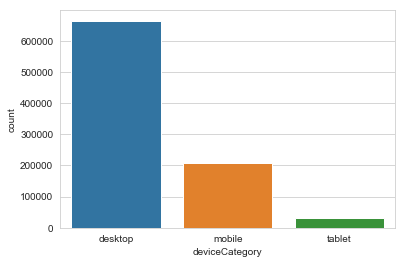

In [18]:
sns.countplot(DVICE['deviceCategory'])

In [19]:
DVICE.operatingSystem.value_counts()

Windows          350072
Macintosh        253938
Android          123892
iOS              107665
Linux             35034
Chrome OS         26337
(not set)          4695
Windows Phone      1216
Samsung             280
BlackBerry          218
Nintendo Wii        100
Firefox OS           89
Xbox                 66
Nintendo WiiU        35
FreeBSD               9
OpenBSD               2
Nokia                 2
SunOS                 1
NTT DoCoMo            1
Nintendo 3DS          1
Name: operatingSystem, dtype: int64

# explore "geoNetwork" variable and its embeded features 

In [20]:
geoNetwork_list = df.geoNetwork.apply(json.loads).tolist()
geoNetwork_keys = []

for i in geoNetwork_list:
   for j in list(i.keys()):
       if(j not in geoNetwork_keys):
           geoNetwork_keys.append(j)

In [21]:
geoNetwork_keys

['continent',
 'subContinent',
 'country',
 'region',
 'metro',
 'city',
 'cityId',
 'networkDomain',
 'latitude',
 'longitude',
 'networkLocation']

In [22]:
GEO=pd.DataFrame(df.geoNetwork.apply(json.loads).tolist())[['continent','subContinent', 'country', 'region', 'city','networkDomain']]

In [23]:
GEO.groupby(['continent','subContinent']).count()

country  region    city  networkDomain
continent subContinent                                              
(not set) (not set)              1468    1468    1468           1468
Africa    Eastern Africa         1927    1927    1927           1927
          Middle Africa           393     393     393            393
          Northern Africa        7683    7683    7683           7683
          Southern Africa        2169    2169    2169           2169
          Western Africa         2573    2573    2573           2573
Americas  Caribbean              2406    2406    2406           2406
          Central America       15583   15583   15583          15583
          Northern America     390657  390657  390657         390657
          South America         41731   41731   41731          41731
Asia      Central Asia           1215    1215    1215           1215
          Eastern Asia          46919   46919   46919          46919
          Southeast Asia        77800   77800   77800          77800
          Southern Asia         59321   59321   59321          59321
          Western Asia          38443   38443   38443          38443
Europe    Eastern Europe        45249   45249   45249          45249
          Northern Europe       58168   58168   58168          58168
          Southern Europe       35780   35780   35780          35780
          Western Europe        59114   59114   59114          59114
Oceania   Australasia           14893   14893   14893          14893
          Melanesia                81      81      81             81
          Micronesian Region       55      55      55             55
          Polynesia                25      25      25             25

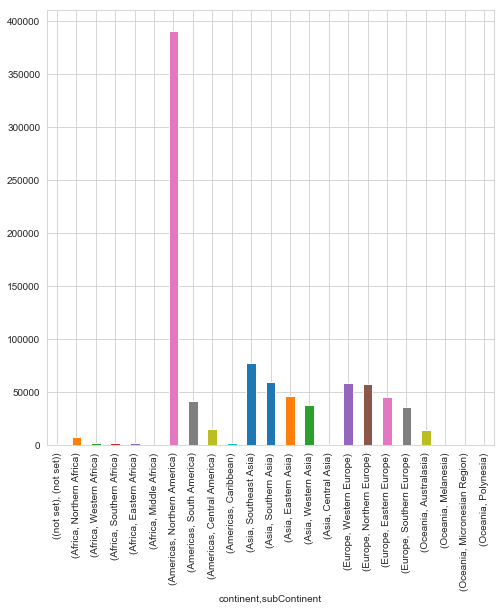

In [24]:
GEO.groupby('continent').subContinent.value_counts().plot(kind='bar',figsize=(8,8))



In [25]:
GEO.continent.value_counts()

Americas     450377
Asia         223698
Europe       198311
Oceania       15054
Africa        14745
(not set)      1468
Name: continent, dtype: int64

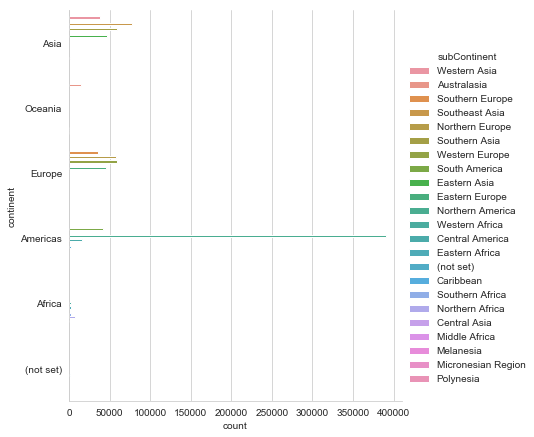

In [26]:

sns.catplot(kind="count",data=GEO, y='continent',hue='subContinent',height=6)

# explore "totals" variable and its embeded features 

In [32]:

totals_list = df.totals.apply(json.loads).tolist()
totals_keys = []

for i in totals_list:
   for j in list(i.keys()):
       if(j not in totals_keys):
           totals_keys.append(j)  

In [33]:
totals_keys

['visits', 'hits', 'pageviews', 'bounces', 'newVisits', 'transactionRevenue']

In [34]:
tot=pd.DataFrame(df.totals.apply(json.loads).tolist())[['visits', 'hits', 'pageviews', 'bounces', 'newVisits', 'transactionRevenue']]

In [35]:
tot.head()

visits hits pageviews bounces newVisits transactionRevenue
0      1    1         1       1         1                NaN
1      1    1         1       1         1                NaN
2      1    1         1       1         1                NaN
3      1    1         1       1         1                NaN
4      1    1         1       1       NaN                NaN

In [37]:
tot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 6 columns):
visits                903653 non-null object
hits                  903653 non-null object
pageviews             903553 non-null object
bounces               450630 non-null object
newVisits             703060 non-null object
transactionRevenue    11515 non-null object
dtypes: object(6)
memory usage: 41.4+ MB


In [38]:
tot['newVisits'].fillna(0, inplace=True)
tot['pageviews'].fillna(0, inplace=True)

tot['bounces'].fillna(0, inplace=True)
tot['transactionRevenue'].fillna('0', inplace=True)



In [39]:
tot['pageviews'] = tot['pageviews'] .astype(int)
tot['newVisits'] = tot['newVisits'] .astype(int)
tot['bounces'] = tot['bounces'].astype(int)
tot['visits'] = tot['visits'].astype(int)
tot['hits'] = tot['hits'].astype(int)
tot['transactionRevenue'] = tot['transactionRevenue'].astype(float)




In [90]:
tot.transactionRevenue[tot['transactionRevenue']>0]

752        37860000.0
753       306670000.0
799        68030000.0
802        26250000.0
859       574150000.0
866         8380000.0
893       395730000.0
910        24080000.0
922        35480000.0
925        35080000.0
930        81500000.0
942       546320000.0
971        63840000.0
974       117340000.0
976        43710000.0
999        34480000.0
1000       35390000.0
1008      339030000.0
1020       33670000.0
1022      635500000.0
1026      103240000.0
1027      305470000.0
1037        5150000.0
1041       90850000.0
1054       10590000.0
1055       25680000.0
1056      338970000.0
2774      593910000.0
3161       44790000.0
3268       30390000.0
             ...     
899951     43430000.0
903089     44790000.0
903118    175800000.0
903122     87990000.0
903167     14370000.0
903168    155970000.0
903189     75180000.0
903194    350000000.0
903201    135920000.0
903211    159980000.0
903222     23180000.0
903228     22970000.0
903234    463600000.0
903235     79990000.0
903243    

# explore "trafficSource" variable and its embeded features 

In [40]:


trafficSource_list = df.trafficSource.apply(json.loads).tolist()
trafficSource_keys = []

for i in trafficSource_list:
   for j in list(i.keys()):
       if(j not in trafficSource_keys):
           trafficSource_keys.append(j) 

In [41]:
trafficSource_keys

['campaign',
 'source',
 'medium',
 'keyword',
 'adwordsClickInfo',
 'isTrueDirect',
 'referralPath',
 'adContent',
 'campaignCode']

In [42]:
TRAFF=pd.DataFrame(df.trafficSource.apply(json.loads).tolist())[['campaign', 'source', 'medium', 'keyword', 'adwordsClickInfo', 'isTrueDirect', 'referralPath', 'adContent',
 'campaignCode']]

In [43]:
TRAFF.campaign.value_counts()

(not set)                                          865347
Data Share Promo                                    16403
AW - Dynamic Search Ads Whole Site                  14244
AW - Accessories                                     7070
test-liyuhz                                           392
AW - Electronics                                       96
Retail (DO NOT EDIT owners nophakun and tianyu)        50
AW - Apparel                                           46
All Products                                            4
Data Share                                              1
Name: campaign, dtype: int64

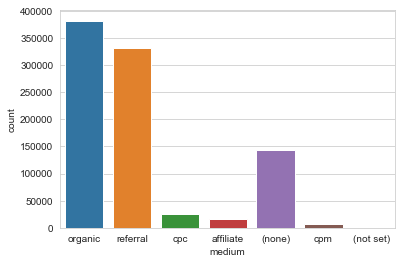

In [44]:
sns.countplot(TRAFF['medium'])